# Examen Módulo 2 - Simulación Montecarlo. <font color=blue>Tipo de examen 2</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E2ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E2ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

# Primer punto. Evaluación numérica de integrales y áreas usando Montecarlo (30 puntos).

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

###  Parte A
**Enunciado** Considere las funciones $f_1(x)= \sqrt{\sin^2(x^{2})8^x} $  y  $f_2(x)=\frac{x^2}{\cos(x)}$.

**Punto A.1 (5 puntos)** Definir una función llamada  `montecarlo1` que corresponda al tipo 1 visto en clase para resolver integrales basada en la definición de valor promedio de una función.

**Solución**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
# import pandas_datareader as web

In [2]:
def montecarlo1(f, a, b, N):
    u=(b-a)*np.random.rand(N) + a
    return (b-a)*np.mean(f(u))

**Punto A.2 (5 puntos)** Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo (3,4). Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000,1000000 y 10000000 términos) y cuyas columnas correspondan a las funciones.


**Solución**

In [3]:
def f1(x):
    return np.sqrt((np.sin(x**2)**2)*(8**x))
def f2(x):
    return x**2/(np.cos(x))

N = np.logspace(1,7,7).astype(int)
tabla1 = pd.DataFrame(index=N, columns=['Aprox1', 'Aprox2'])
for n in N:
    tabla1.loc[n,'Aprox1']=montecarlo1(f1,3,4,n)
    tabla1.loc[n,'Aprox2']=montecarlo1(f2,3,4,n)
tabla1

,Aprox1,Aprox2
10,14.3357,-13.0734
100,20.4048,-14.4302
1000,22.734,-14.4462
10000,23.3227,-14.2396
100000,23.5164,-14.2101
1000000,23.448,-14.2179
10000000,23.4639,-14.2246


### Parte B

**Enunciado** Considere la región definida por:
$$0.5<e^{-0.01x^2-0.01y^2}\sin(2x^2+2y^2) $$

**Punto B.1 (5 puntos)** Definir una función llamada  `montecarlo2` que corresponda al tipo 2 visto en clase para encontrar áreas basada en probabilidades y una variable aleatoria de bernoulli.

**Solución**

In [4]:
def montecarlo2(region, a1, b1, a2, b2, n):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1,b1,n)
    y = np.random.uniform(a2,b2,n)
    b = region(x,y)
    return AR*np.mean(b)

**Punto B.2 (5 puntos)** Graficar la región dada anteriormente y encontrar los límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$

**Solución**

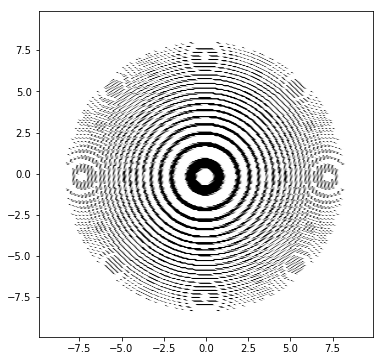

In [5]:
def region(x,y):
    return .5<np.exp(-(.01*x**2)-(.01*y**2))*np.sin(2*(x**2)+2*(y**2))

x=np.linspace(-9,9,250)
y=np.linspace(-9,9,250)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(6,6))
plt.scatter(X,Y,c=~region(X,Y), cmap='bone')
plt.show()

**Punto B.3 (10 puntos)** Utilizar la función `montecarlo2` para realizar la evaluación numérica del área. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000, 1000000, 10000000 términos) y cuyas columnas correspondan a las funciones.

**Solución**

In [6]:
N = np.logspace(1,7,7).astype(int)
tabla2=pd.DataFrame(index=N,columns=['Aprox'])

for n in N:
    tabla2.loc[n,'Aprox']=montecarlo2(region,-9,9,-9,9,n)

tabla2

,Aprox
10,32.4
100,42.12
1000,56.376
10000,51.516
100000,52.394
1000000,51.4966
10000000,51.5473


# Segundo punto. Fractales (30 puntos).

**Enunciado.** 
- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico (¿Qué es esto?).

Como en la clase de fractales, repliquemos el fractal descrito por la siguiente tabla:


|  i | $a_i$ | $b_i$ | $c_i$ | $d_i$ | $e_i$ | $f_i$ |
|---|---|---|---|---|---|---|
|0| 0.5| 	-0.4 |	0.5 | 0.4 |	77.5 |	-15.5 |
|1| 0.5 |	-0.3 |	0.5 |	0.3 |	15.5 |	15.5 |

**Nota: Las probabilidades de ocurrencia de cada uno de los valores de $i$ son iguales.**


**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

**Punto 1 (10 puntos)** Definir los datos de la tabla anterior en un DataFrame de `pandas`, donde el index sea la variable $i=0,1,2,3$ y las columnas estén definidas por las constantes $a_i, \ldots,\,f_i,\,p_i$.

**Solución**

In [7]:
i=0,1
tabla3 = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi'], dtype='float')
tabla3['ai'] = [.5, .5]
tabla3['bi'] = [-.4, -.3]
tabla3['ci'] = [.5, .5]
tabla3['di'] = [.4, .3]
tabla3['ei'] = [77.5, 15.5]
tabla3['fi'] = [-15.5, 15.5]
tabla3['pi'] = [.5, .5]

tabla3

,ai,bi,ci,di,ei,fi,pi
0,0.5,-0.4,0.5,0.4,77.5,-15.5,0.5
1,0.5,-0.3,0.5,0.3,15.5,15.5,0.5


**Punto 2 (10 puntos)** Guardar los datos del DataFrame anterior en un arreglo matricial de `numpy`.

**Solución**

In [8]:
matriz = tabla3.iloc[:,:].values
matriz

array([[  0.5,  -0.4,   0.5,   0.4,  77.5, -15.5,   0.5],
       [  0.5,  -0.3,   0.5,   0.3,  15.5,  15.5,   0.5]])

**Punto 3 (10 puntos)** Graficar el fractal definido por las 3 transformaciones afines.

**Solución**

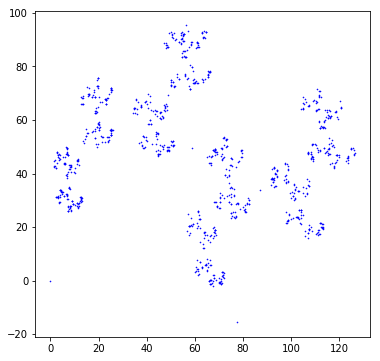

In [9]:
x=[0]
y=[0]

seq = np.array([0,1])
prob = matriz[:,-1]
a = matriz[:,0]
b = matriz[:,1]
c = matriz[:,2]
d = matriz[:,3]
e = matriz[:,4]
f = matriz[:,5]

for n in range(1000):
    i = random.choices(seq,prob)
    x.append(a[i]*x[-1]+b[i]*y[-1]+e[i])
    y.append(c[i]*x[-2]+d[i]*y[-1]+f[i])
    
plt.figure(figsize=(6,6))
plt.scatter(x,y,c='b',s=.35)
plt.show()